<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Using-scipy" data-toc-modified-id="Using-scipy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using scipy</a></span></li><li><span><a href="#Using-scikit" data-toc-modified-id="Using-scikit-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using scikit</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Preprocessing-(standardization)" data-toc-modified-id="Preprocessing-(standardization)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Preprocessing (standardization)</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Regression-plot" data-toc-modified-id="Regression-plot-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regression plot</a></span></li><li><span><a href="#Pearson-correlation" data-toc-modified-id="Pearson-correlation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pearson correlation</a></span></li><li><span><a href="#Regression-line" data-toc-modified-id="Regression-line-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Regression line</a></span></li></ul></li><li><span><a href="#Linear-regression-using-scipy" data-toc-modified-id="Linear-regression-using-scipy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear regression using scipy</a></span><ul class="toc-item"><li><span><a href="#Nonlinear-regression" data-toc-modified-id="Nonlinear-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Nonlinear regression</a></span></li></ul></li><li><span><a href="#Multiple-linear-regression" data-toc-modified-id="Multiple-linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiple linear regression</a></span></li><li><span><a href="#Using-statsmodels" data-toc-modified-id="Using-statsmodels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using statsmodels</a></span></li><li><span><a href="#Generalized-linear-models" data-toc-modified-id="Generalized-linear-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generalized linear models</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Multiple-linear-regression" data-toc-modified-id="Multiple-linear-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiple linear regression</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/50_Startups.csv')

# Linear regression

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
len(data)

50

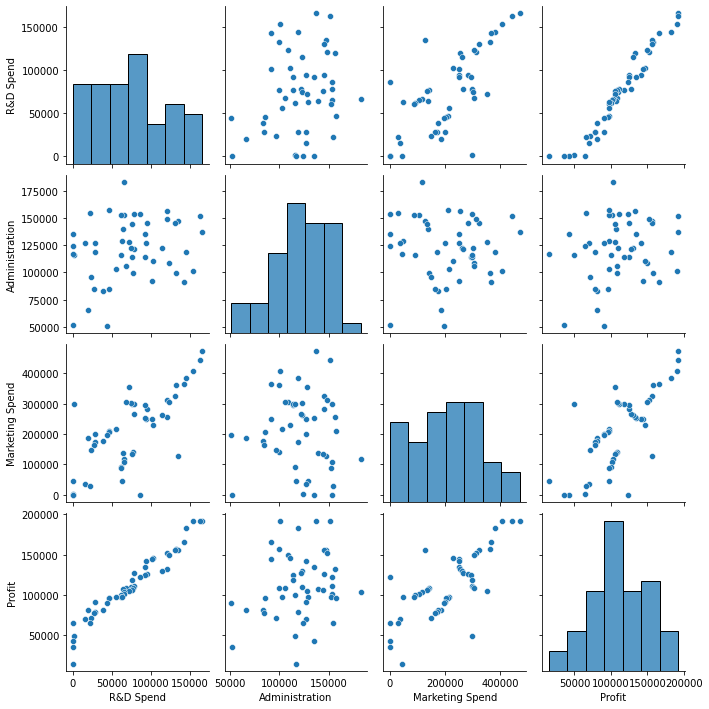

In [6]:
sns.pairplot(data)

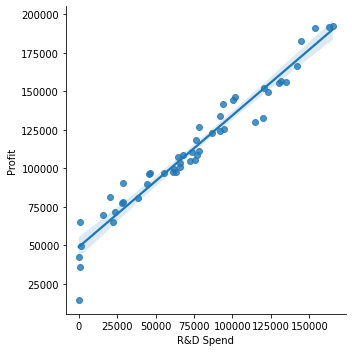

In [8]:
sns.lmplot(data=data, x='R&D Spend', y='Profit')

## Using scipy

In [9]:
stats.linregress(data['R&D Spend'], data['Profit'])

LinregressResult(slope=0.8542913709388089, intercept=49032.899141252135, rvalue=0.9729004656594832, pvalue=3.500322243690248e-32, stderr=0.029305591498200445, intercept_stderr=2537.8969493237905)

In [10]:
stats.pearsonr(data['R&D Spend'], data['Profit'])

(0.9729004656594831, 3.5003222436905997e-32)

In [12]:
stats.pearsonr(data['R&D Spend'], data['Profit'])[0] ** 2

0.946535316080439

In [13]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

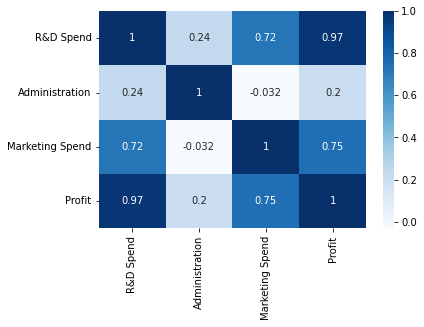

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

## Using scikit

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [23]:
X = data[['R&D Spend','Marketing Spend']]

In [24]:
y = data['Profit']

In [25]:
model.fit(X, y)

LinearRegression()

In [90]:
model.coef_

array([0.79658404, 0.02990788])

In [91]:
model.intercept_

46975.864220719996

### Evaluation

In [92]:
model.score(X,y)

0.9504503015559763

In [93]:
y_pred = model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error

In [94]:
mean_squared_error(y, y_pred)

78887897.00648756

## Preprocessing (standardization)

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [87]:
model.coef_

array([0.79658404, 0.02990788])

In [89]:
model.intercept_

46975.864220719996

In [66]:
sc.fit(X)

StandardScaler()

In [67]:
x_sc = sc.transform(X)

In [71]:
df = pd.DataFrame(x_sc, columns = ['R+D', 'Marketing'])

In [74]:
df.head()

,R+D,Marketing
0,2.016411,2.153943
1,1.955860,1.923600
2,1.754364,1.626528
3,1.554784,1.422210
4,1.504937,1.281528


In [78]:
y_sc = (y - y.mean()) / y.std()

In [79]:
model.fit(x_sc, y_sc)

LinearRegression()

In [80]:
model.coef_

array([0.89806347, 0.0898295 ])

In [81]:
model.intercept_

-4.4226350723310925e-16

## Train test split

In [39]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
len(X_train)

40

In [58]:
len(X_test)

10

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
model.score(X_test, y_test)

0.9481692773564137

In [61]:
model.score(X_train, y_train)

0.9481378588241705